In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import operator
import os
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
employee_df = pd.read_csv('employee_retention_data.csv')
employee_df.head()

employee_id  company_id              dept  seniority    salary   join_date  \
0      13021.0           7  customer_service         28   89000.0  2014-03-24   
1     825355.0           7         marketing         20  183000.0  2013-04-29   
2     927315.0           4         marketing         14  101000.0  2014-10-13   
3     662910.0           7  customer_service         20  115000.0  2012-05-14   
4     256971.0           2      data_science         23  276000.0  2011-10-17   

    quit_date  
0  2015-10-30  
1  2014-04-04  
2         NaN  
3  2013-06-07  
4  2014-08-22

In [3]:
employee_df['quit_date'] = employee_df['quit_date'].fillna('2015-12-31')

In [4]:
print(employee_df.isnull().sum()/len(employee_df)*100)

employee_id    0.0
company_id     0.0
dept           0.0
seniority      0.0
salary         0.0
join_date      0.0
quit_date      0.0
dtype: float64


In [5]:
import datetime
from datetime import date
date_format = "%Y-%m-%d"
a = datetime.datetime.strptime('2014-03-24', date_format)
b = datetime.datetime.strptime('2015-10-30', date_format)
delta = b - a
a

datetime.datetime(2014, 3, 24, 0, 0)

In [6]:
try:
    employee_df['join_date'] = employee_df['join_date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d"))
except:
    pass


In [7]:
try:
    employee_df['quit_date'] = employee_df['quit_date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d"))
except:
    pass
employee_df.dtypes


employee_id           float64
company_id              int64
dept                   object
seniority               int64
salary                float64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dtype: object

In [8]:
employee_df['num_of_days'] = (employee_df['quit_date']-employee_df['join_date']).astype('timedelta64[D]')
employee_df.head()

employee_id  company_id              dept  seniority    salary  join_date  \
0      13021.0           7  customer_service         28   89000.0 2014-03-24   
1     825355.0           7         marketing         20  183000.0 2013-04-29   
2     927315.0           4         marketing         14  101000.0 2014-10-13   
3     662910.0           7  customer_service         20  115000.0 2012-05-14   
4     256971.0           2      data_science         23  276000.0 2011-10-17   

   quit_date  num_of_days  
0 2015-10-30        585.0  
1 2014-04-04        340.0  
2 2015-12-31        444.0  
3 2013-06-07        389.0  
4 2014-08-22       1040.0

In [9]:
first_date = datetime.datetime.strptime('2014-01-24',"%Y-%m-%d")
last_date = datetime.datetime.strptime('2015-12-31',"%Y-%m-%d")
delta = (last_date - first_date).days
day = [(first_date + datetime.timedelta(i)) for i in range(delta+1)]


In [10]:
def mapping(listA,listB):
    result = []
    for k in listA:
        for v in listB:
            result.append([k,v])
    return result

In [11]:
company_id = list(employee_df['company_id'].unique())

In [12]:
n = []
for i in range(len(day)):
    for j in range(len(company_id)):
        num_join = len(employee_df[((employee_df['join_date'] < day[i])&(employee_df['company_id'] == company_id[j]))])
        num_quit = len(employee_df[((employee_df['quit_date'] < day[i])&(employee_df['company_id'] == company_id[j]))])
        n.append([day[i],company_id[j],(num_join-num_quit)])
headcount_df = pd.DataFrame(n,columns=['day','company_id','employee_headcount'])

In [13]:
headcount_df.head(20)

day  company_id  employee_headcount
0  2014-01-24           7                 498
1  2014-01-24           4                 794
2  2014-01-24           2                1722
3  2014-01-24           9                 407
4  2014-01-24           1                3509
5  2014-01-24           6                 506
6  2014-01-24          10                 354
7  2014-01-24           5                 668
8  2014-01-24           3                1092
9  2014-01-24           8                 419
10 2014-01-24          11                   9
11 2014-01-24          12                  10
12 2014-01-25           7                 498
13 2014-01-25           4                 790
14 2014-01-25           2                1716
15 2014-01-25           9                 401
16 2014-01-25           1                3482
17 2014-01-25           6                 499
18 2014-01-25          10                 352
19 2014-01-25           5                 665

In [14]:
headcount_df.shape

(8484, 3)

In [15]:
employee_df['company_id'].unique()

array([ 7,  4,  2,  9,  1,  6, 10,  5,  3,  8, 11, 12])

In [16]:
## Visualization

/home/an/.local/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/an/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


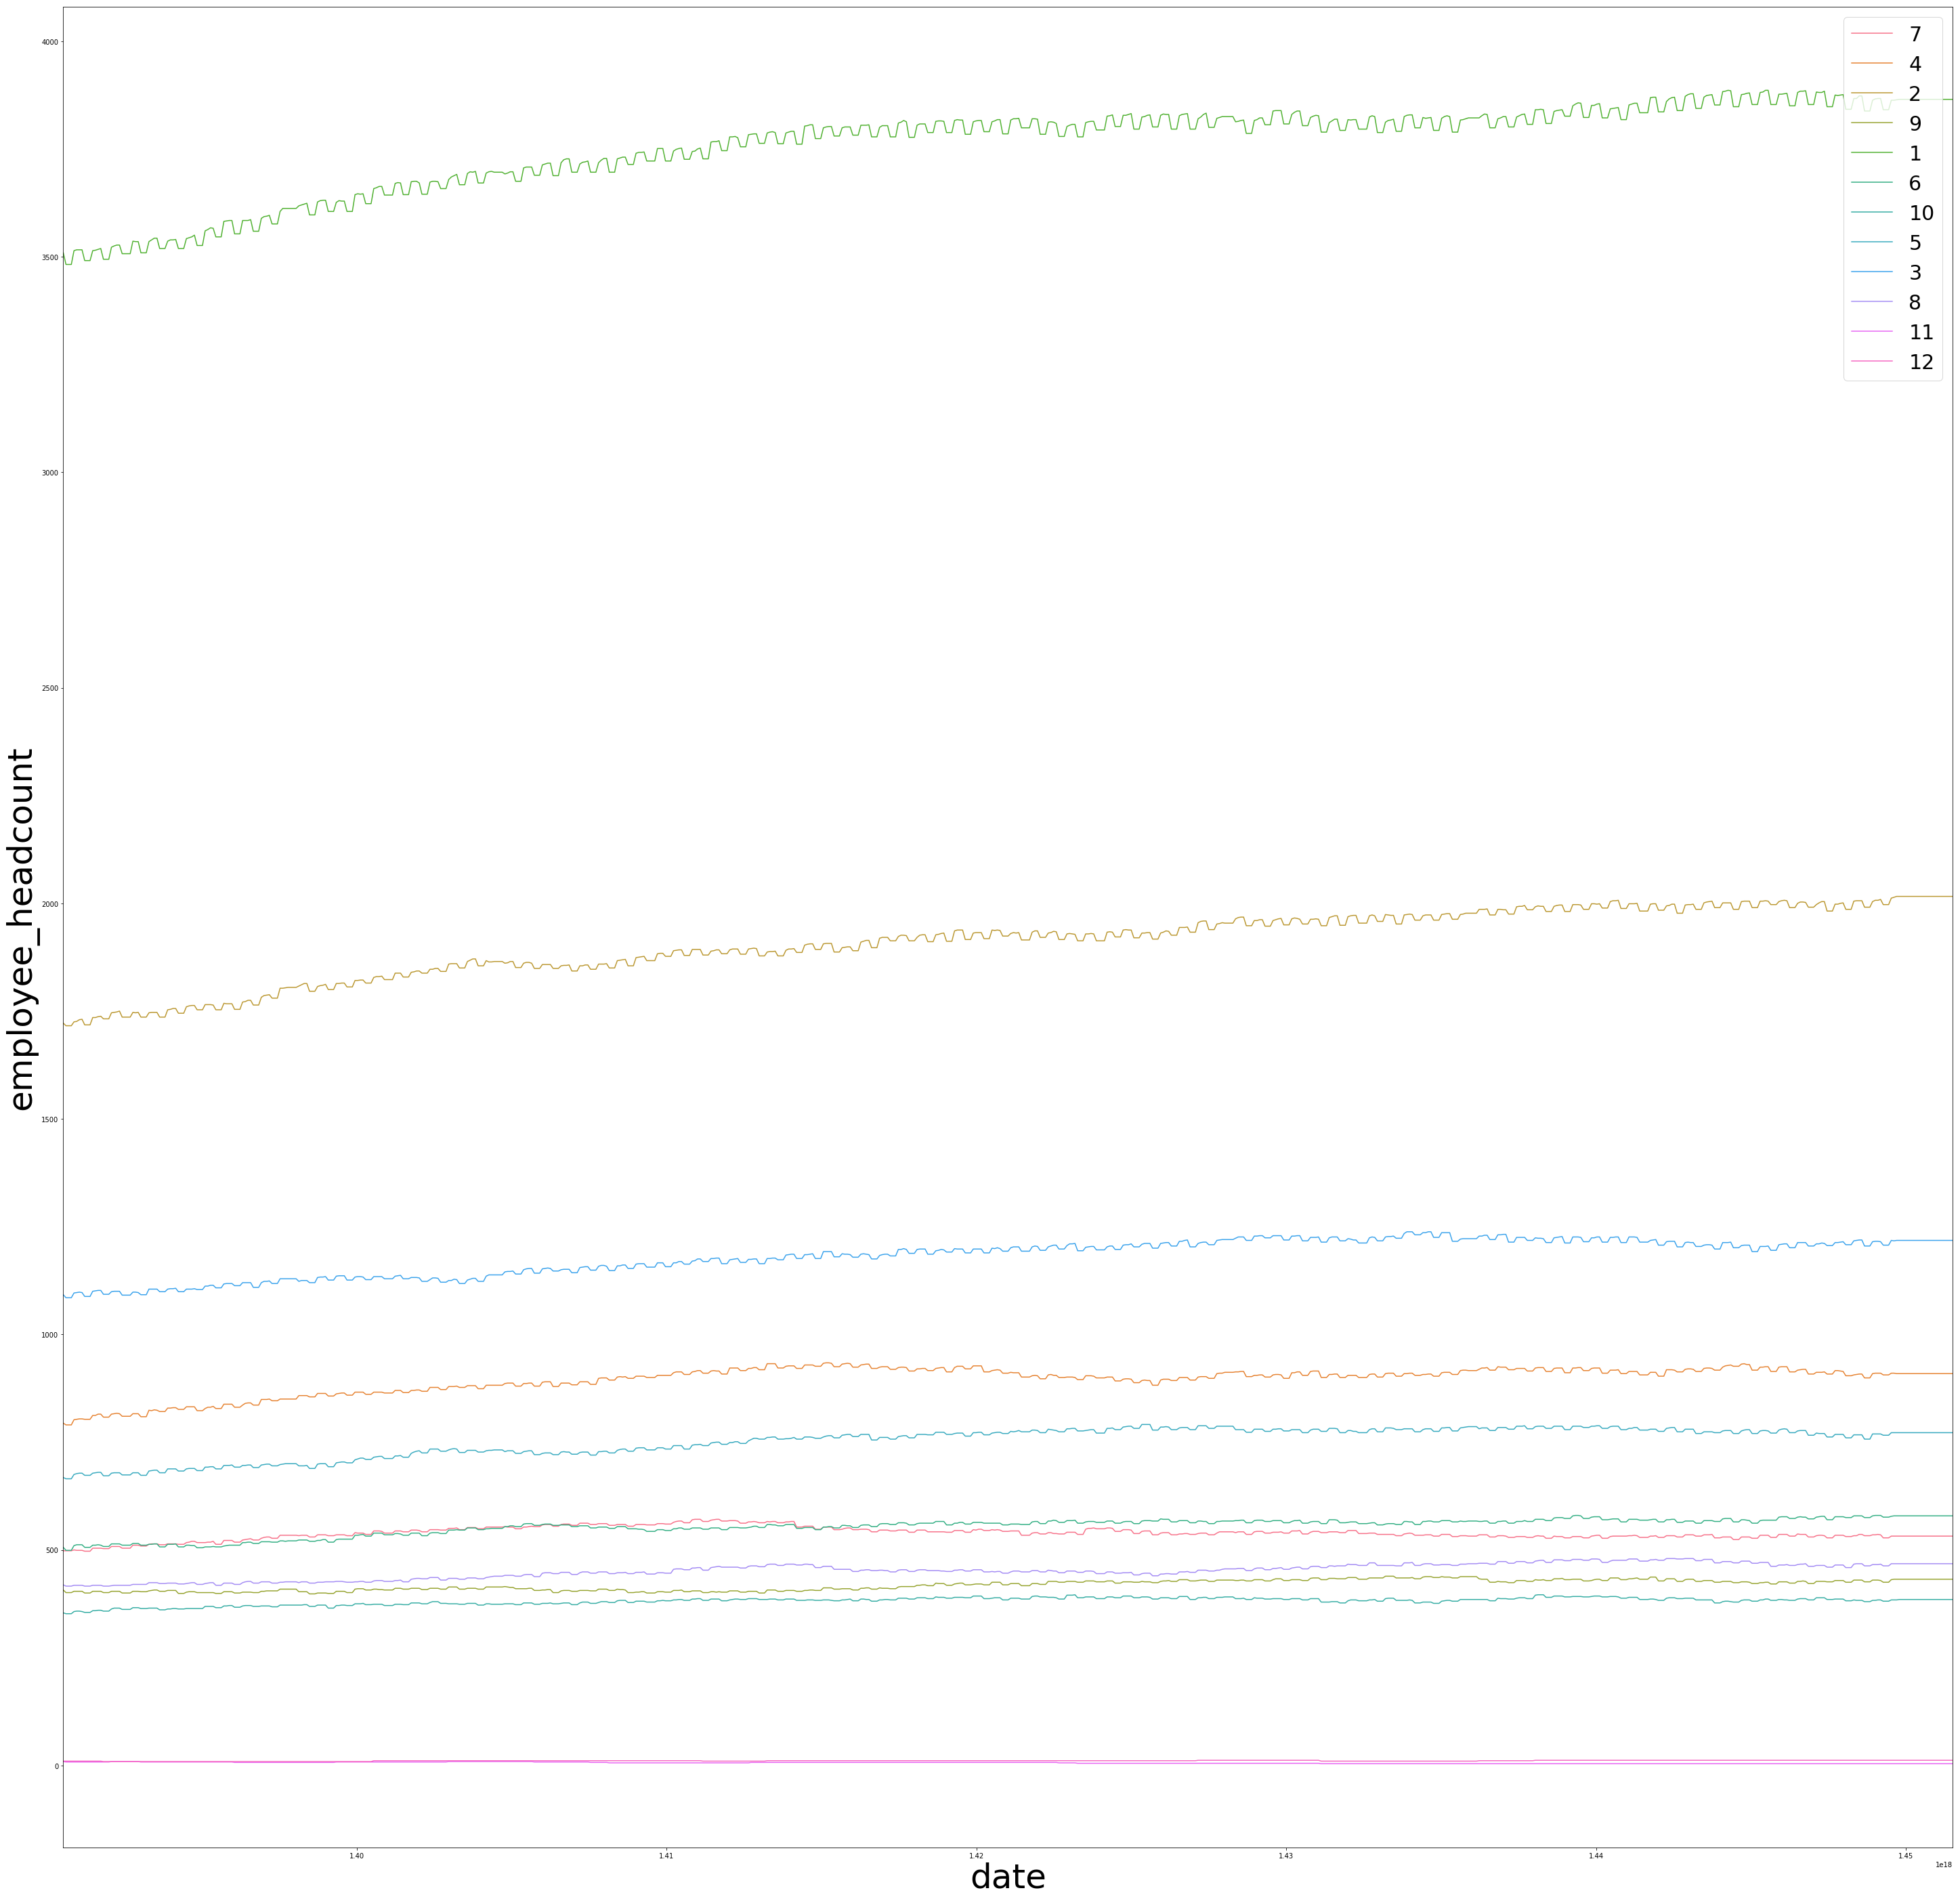

In [17]:
fig, ax = plt.subplots(figsize=(50,50))
sns.tsplot(data=headcount_df,time='day',condition='company_id',unit='company_id',value='employee_headcount')
plt.legend(prop={'size': 30})
plt.xlabel('date',fontsize=50)
plt.ylabel('employee_headcount',fontsize=50)

plt.show()



In [18]:
## Building algorithms

In [19]:
employee_df = pd.get_dummies(employee_df, columns=["dept","company_id"])
employee_df.head()

employee_id  seniority    salary  join_date  quit_date  num_of_days  \
0      13021.0         28   89000.0 2014-03-24 2015-10-30        585.0   
1     825355.0         20  183000.0 2013-04-29 2014-04-04        340.0   
2     927315.0         14  101000.0 2014-10-13 2015-12-31        444.0   
3     662910.0         20  115000.0 2012-05-14 2013-06-07        389.0   
4     256971.0         23  276000.0 2011-10-17 2014-08-22       1040.0   

   dept_customer_service  dept_data_science  dept_design  dept_engineer  \
0                      1                  0            0              0   
1                      0                  0            0              0   
2                      0                  0            0              0   
3                      1                  0            0              0   
4                      0                  1            0              0   

       ...        company_id_3  company_id_4  company_id_5  company_id_6  \
0      ...                   0             0             0             0   
1      ...                   0             0             0             0   
2      ...                   0             1             0             0   
3      ...                   0             0             0             0   
4      ...                   0             0             0             0   

   company_id_7  company_id_8  company_id_9  company_id_10  company_id_11  \
0             1             0             0              0              0   
1             1             0             0              0              0   
2             0             0             0              0              0   
3             1             0             0              0              0   
4             0             0             0              0              0   

   company_id_12  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 24 columns]

In [20]:
employee_df['left'] = np.where(employee_df['quit_date']=='2015-12-31',0,1)
not_left = employee_df[employee_df['left'] == 0].shape[0]
left = employee_df[employee_df['left'] == 1].shape[0]

print("Left employees = {}".format(left))
print("Not left employees = {}".format(not_left))
employee_df.head()

Left employees = 13510
Not left employees = 11192


employee_id  seniority    salary  join_date  quit_date  num_of_days  \
0      13021.0         28   89000.0 2014-03-24 2015-10-30        585.0   
1     825355.0         20  183000.0 2013-04-29 2014-04-04        340.0   
2     927315.0         14  101000.0 2014-10-13 2015-12-31        444.0   
3     662910.0         20  115000.0 2012-05-14 2013-06-07        389.0   
4     256971.0         23  276000.0 2011-10-17 2014-08-22       1040.0   

   dept_customer_service  dept_data_science  dept_design  dept_engineer  ...   \
0                      1                  0            0              0  ...    
1                      0                  0            0              0  ...    
2                      0                  0            0              0  ...    
3                      1                  0            0              0  ...    
4                      0                  1            0              0  ...    

   company_id_4  company_id_5  company_id_6  company_id_7  company_id_8  \
0             0             0             0             1             0   
1             0             0             0             1             0   
2             1             0             0             0             0   
3             0             0             0             1             0   
4             0             0             0             0             0   

   company_id_9  company_id_10  company_id_11  company_id_12  left  
0             0              0              0              0     1  
1             0              0              0              0     1  
2             0              0              0              0     0  
3             0              0              0              0     1  
4             0              0              0              0     1  

[5 rows x 25 columns]

In [21]:
from sklearn.model_selection import train_test_split
X = employee_df.drop(['employee_id','join_date','quit_date','left'],axis=1)
y = employee_df['left']


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.8)
pca.fit(StandardScaler().fit_transform(X_train))
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

/home/an/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


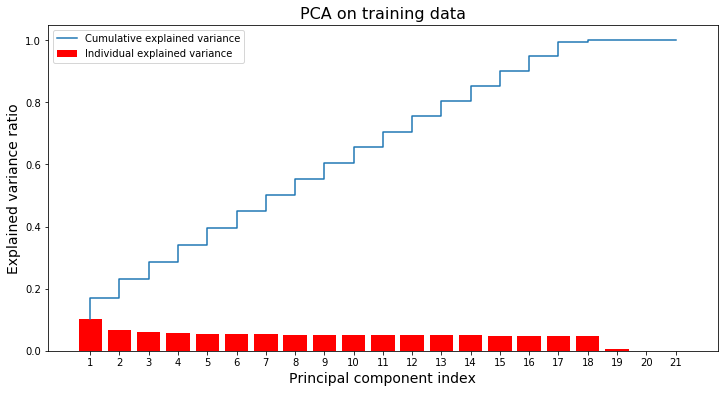

In [43]:
plt.figure(figsize=(12, 6))
plt.bar(range(1, 22), pca.explained_variance_ratio_, label="Individual explained variance",color='red')
plt.step(range(1, 22), cum_var_exp, label="Cumulative explained variance")
plt.xticks(range(1, 22))
plt.legend(loc="best")
plt.xlabel("Principal component index", {"fontsize": 14})
plt.ylabel("Explained variance ratio", {"fontsize": 14})
plt.title("PCA on training data", {"fontsize": 16});
plt.show()


--> 16,17 features

## features ranking

In [26]:
##RandomForestRegressor
selected_features = X.drop(['num_of_days'],axis =1)
target = employee_df['num_of_days']
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
selected_features=pd.get_dummies(selected_features)
model.fit(selected_features,target)
features = selected_features.columns
importances = model.feature_importances_
nSelectedFeature = 10
indices = np.argsort(importances)[-(nSelectedFeature-1):]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

/home/an/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


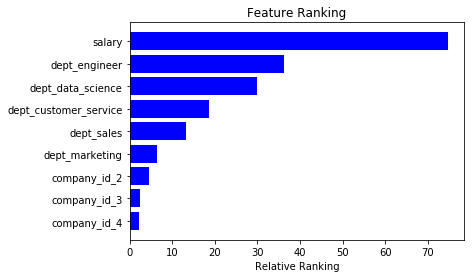

In [27]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(selected_features,target)
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10)
rfe = rfe.fit_transform(selected_features, target)
from sklearn.feature_selection import f_regression
ffs = f_regression(selected_features,target )
rankinfo = ffs[0]
features = selected_features.columns
nSelectedFeature = 10
indices = np.argsort(rankinfo)[-(nSelectedFeature-1):]
plt.title('Feature Ranking')
plt.barh(range(len(indices)), rankinfo[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Ranking')
plt.show()

## Random Forest 

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.pipeline import make_pipeline

In [44]:
clf = RandomForestClassifier(n_estimators=20,class_weight='balanced',random_state=123)
# # specify parameters and distributions to sample from
pip_rf = make_pipeline(StandardScaler(),clf)
param_dist = {"randomforestclassifier__max_depth": [3, None],
              "randomforestclassifier__n_estimators": [10, 50, 100, 500],
              "randomforestclassifier__max_features": ["sqrt", "log2", 0.4, 0.5],
              "randomforestclassifier__min_samples_leaf": [1, 3, 5],
              "randomforestclassifier__min_samples_split": sp_randint(2, 11),
              "randomforestclassifier__bootstrap": [True, False],
              "randomforestclassifier__criterion": ["gini", "entropy"]}
# # run randomized search
n_iter_search = 20
rs_rf = RandomizedSearchCV(pip_rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)
#
rs_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0....timators=20, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'randomforestclassifier__bootstrap': [True, False], 'randomforestclassifier__max_depth': [3, None], 'randomforestclassifier__min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f871c167ac8>, 'randomforestclassifier__n_estimators': [10, 50, 100, 500], 'randomforestclassifier__criterion': ['gini', 'entropy'], 'randomforestclassifier__max_features': ['sqrt', 'log2', 0.4, 0.5], 'randomfo

In [50]:
print("The best hyperparameters:")
for hyperparam in random_search.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", random_search.best_params_[hyperparam])

print("Best 5-folds CV f1-score: "+ str(rs_rf.best_score_ * 100))


The best hyperparameters:
bootstrap :  True
max_depth :  None
min_samples_split :  10
n_estimators :  500
criterion :  entropy
max_features :  0.5
min_samples_leaf :  3
Best 5-folds CV f1-score: 74.79378573958809


In [51]:
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=50,min_samples_leaf=1,bootstrap=False,
                               min_samples_split=5,max_features=0.5,criterion='gini')
model.fit(X_train,y_train)
print("classification report:")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


classification report:
             precision    recall  f1-score   support

          0       0.75      0.68      0.71      2203
          1       0.76      0.82      0.79      2738

avg / total       0.76      0.76      0.75      4941



## Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
pip_logmod = make_pipeline(StandardScaler(),
                           LogisticRegression(class_weight="balanced"))
hyperparam_range = np.arange(0.5, 20.1, 0.5)
hyperparam_grid = {"logisticregression__penalty": ["l1", "l2"],
                   "logisticregression__C":  hyperparam_range,
                   "logisticregression__fit_intercept": [True, False]
                  }
rs_logreg = RandomizedSearchCV(pip_logmod,
                           hyperparam_grid,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)
rs_logreg.fit(X_train, y_train)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'logisticregression__C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ]), 'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__fit_intercept': [True, False]},
          pre_dispatch='2*n_jobs', random

In [52]:
print("The best hyperparameters:")
for hyperparam in gs_logmodel.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", rs_logreg.best_params_[hyperparam])

print("Best 5-folds CV f1-score: "+ str(rs_logreg.best_score_ * 100))
print()


The best hyperparameters:
C :  8.0
penalty :  l2
fit_intercept :  True
Best 5-folds CV f1-score: 53.180507059359336



In [53]:
model = LogisticRegression(penalty='l2',C=8,fit_intercept=True)
model.fit(X_train,y_train)
print("classification report:")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


classification report:
             precision    recall  f1-score   support

          0       0.69      0.29      0.41      2203
          1       0.61      0.89      0.73      2738

avg / total       0.65      0.63      0.59      4941



## KNN 

In [54]:
from sklearn.neighbors import KNeighborsClassifier
pip_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
hyperparam_range = range(1, 20)
param_grid={"kneighborsclassifier__n_neighbors": hyperparam_range,
            "kneighborsclassifier__weights": ["uniform", "distance"]}

rs_knn = RandomizedSearchCV(pip_knn,
                            param_distributions=param_grid,
                            scoring = "f1",
                            n_jobs=-1, cv=5)
rs_knn.fit(X_train, y_train)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'kneighborsclassifier__weights': ['uniform', 'distance'], 'kneighborsclassifier__n_neighbors': range(1, 20)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [57]:
print("The best hyperparameters:")
for hyperparam in rs_knn.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", rs_knn.best_params_[hyperparam])

print("Best 5-folds CV f1-score: "+ str(rs_knn.best_score_ * 100))
print()


The best hyperparameters:
weights :  distance
n_neighbors :  16
Best 5-folds CV f1-score: 72.58311120177416



In [59]:
model = KNeighborsClassifier(n_neighbors = 16, weights = "distance")
model.fit(X_train,y_train)
print("classification report:")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


classification report:
             precision    recall  f1-score   support

          0       0.71      0.57      0.63      2203
          1       0.70      0.81      0.75      2738

avg / total       0.70      0.70      0.70      4941

